In [1]:
import jsonlines
import json
from tqdm import tqdm
import glob
import re

In [7]:
path_list = glob.glob('data/final_features/*.jsonl')
path_list = sorted(path_list)

In [10]:
reg = re.compile(r'([0-9]+)')

In [ ]:
# inteiro_teor_list = []
# for path in path_list:
#     year = reg.search(path).group(1)
#     print('Running ' + year + '...')
#     with jsonlines.open(path) as reader:
#         for obj in tqdm(reader):
#             inteiro_teor_list.append(obj['inteiro_teor'])

In [11]:
from syntok.tokenizer import Tokenizer

In [12]:
tok = Tokenizer()

In [13]:
with open('corpus.txt', 'a+', encoding='utf-8') as f:
    for path in path_list:
        year = reg.search(path).group(1)
        print('Running ' + year + '...')
        with jsonlines.open(path) as reader:
            for obj in tqdm(reader):
                inteiro_teor_tokens = []
                for token in tok.tokenize(obj['inteiro_teor'].lower()):
                    f.write(token.value + ' ')
                f.write('\n')

0it [00:00, ?it/s]

Running 2010...


130534it [22:01, 98.75it/s]
9it [00:00, 89.11it/s]

Running 2011...


139185it [29:01, 79.90it/s]
2it [00:00, 18.91it/s]

Running 2012...


119398it [23:54, 83.25it/s]
10it [00:00, 86.15it/s]

Running 2013...


131581it [27:53, 78.65it/s]
9it [00:00, 87.92it/s]

Running 2014...


146430it [35:02, 69.63it/s]
1it [00:00,  6.68it/s]

Running 2016...


119007it [24:35, 80.64it/s] 


In [11]:
import numpy as np

In [16]:
# sentences = []
# for tokenized_inteiro_teor in all_inteiro_teor_tokens:
#     length = int(len(tokenized_inteiro_teor)/100) + 1
#     chunks = np.array_split(tokenized_inteiro_teor, length)
#     for c in chunks:
#         sentences.append(c.tolist())

In [2]:
import gensim
from gensim.models import Word2Vec
import multiprocessing

In [173]:
# model = Word2Vec(sentences=sentences, size=100, window=5, min_count=5, workers=4, sg=0)

In [3]:
data = gensim.models.word2vec.LineSentence('corpus.txt')

In [5]:
%time model = Word2Vec(data, size=50, window=5, min_count=3, workers=multiprocessing.cpu_count())

CPU times: user 4h 56min 33s, sys: 2min 15s, total: 4h 58min 48s
Wall time: 1h 41min 54s


In [6]:
model.wv.most_similar('parágrafo', topn=25)

[('§', 0.8314831256866455),
 ('§§', 0.7303279042243958),
 ('paragrafo', 0.7244558930397034),
 ('licc', 0.7139936685562134),
 ('(§', 0.7087696194648743),
 ('páragrafo', 0.6698433756828308),
 ('parágrafos', 0.6698262095451355),
 ('paragráfo', 0.6528352499008179),
 ('lindb', 0.6523408889770508),
 ('parág', 0.6415010094642639),
 ('prágrafo', 0.6210716962814331),
 ('parag', 0.6108776330947876),
 ('paraìgrafo', 0.6020615696907043),
 ('parágafo', 0.598124086856842),
 ('2000número', 0.5808497071266174),
 ('caput', 0.5727806091308594),
 ('8-04', 0.5725184679031372),
 ('coeficente', 0.5724833607673645),
 ('parégrafo', 0.5711718797683716),
 ('semestre', 0.567760169506073),
 ('31-7-06', 0.5562552809715271),
 ('l.i.c.c', 0.5481703281402588),
 ('pcsc', 0.5479350090026855),
 ('regimejurídico', 0.5475701093673706),
 ('parágrago', 0.5473620891571045)]

In [12]:
keys = ['parágrafo', 'acordão', 'conhecido']

In [13]:
embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.wv.most_similar(word, topn=25):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

/home/thiago/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [14]:
from sklearn.manifold import TSNE

In [15]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


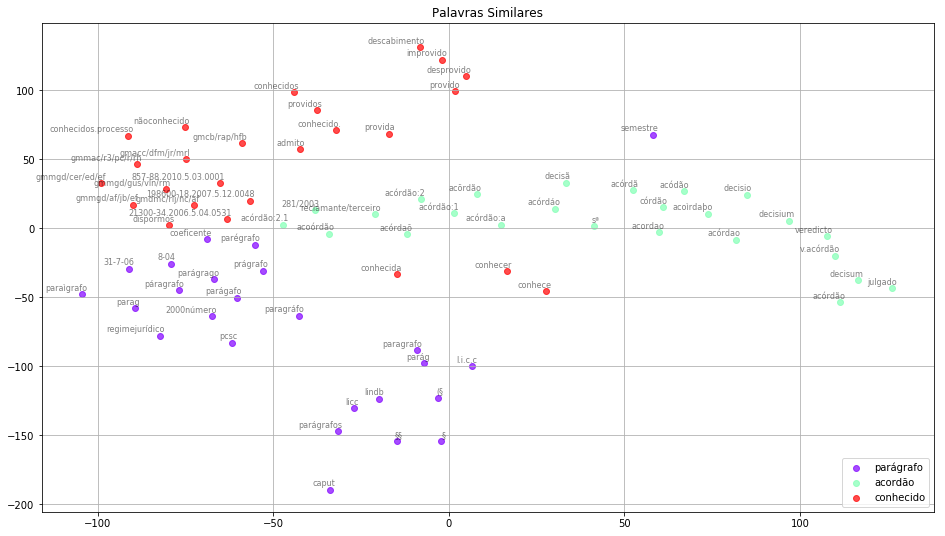

In [17]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Palavras Similares', keys, embeddings_en_2d, word_clusters, 0.7, 'similar_words.png')

In [18]:
import numpy as np
import tensorflow as tf

In [19]:
embeddings = {}
for index, word in enumerate(model.wv.vocab.keys()):
    embeddings[word] = model.wv.vectors[index]

In [20]:
embeddings_vectors = np.stack(list(embeddings.values()), axis=0)

In [35]:
# Create some variables.
emb = tf.Variable(embeddings_vectors, name='word_embeddings')

# Add an op to initialize the variable.
init_op = tf.global_variables_initializer()

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

# Later, launch the model, initialize the variables and save the
# variables to disk.
with tf.Session() as sess:
   sess.run(init_op)

# Save the variables to disk.
   save_path = saver.save(sess, 'model_dir/w2v_50.ckpt')
   print('Model saved in path:', save_path)

Model saved in path: model_dir/w2v_50.ckpt


In [37]:
import os

In [40]:
words = '\n'.join(list(embeddings.keys()))

with open(os.path.join('model_dir', 'metadata.tsv'), 'w', encoding='utf-8') as f:
   f.write(words)